In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.drop('id',axis=1,inplace=True)

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
df['age']=df['age'].astype(int)

In [15]:
df['age'].dtype

dtype('int32')

In [17]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [21]:
df['bmi'].isnull().sum()

0

In [23]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [25]:
list=[df['ever_married'],df['work_type'],df['gender'],df['Residence_type'],df['smoking_status']]
for i in list:
    print(i.value_counts(),"\n")

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 



In [27]:
le=LabelEncoder()
df['ever_married']=le.fit_transform(df['ever_married'])
df['Residence_type']=le.fit_transform(df['Residence_type'])

In [29]:
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

In [31]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0,1,228.69,36.600000,0,1
1,0,61,0,0,1,1,0,202.21,28.893237,1,1
2,1,80,0,1,1,0,0,105.92,32.500000,1,1
3,0,49,0,0,1,0,1,171.23,34.400000,2,1
4,0,79,1,0,1,1,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,0,1,83.75,28.893237,1,0
5106,0,81,0,0,1,1,1,125.20,40.000000,1,0
5107,0,35,0,0,1,1,0,82.99,30.600000,1,0
5108,1,51,0,0,1,0,0,166.29,25.600000,0,0


In [33]:
df.corr()['stroke'][:-1].sort_values(ascending=False)

age                  0.245128
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.038947
Residence_type       0.015458
gender               0.008929
work_type           -0.032098
smoking_status      -0.066393
Name: stroke, dtype: float64

<Axes: >

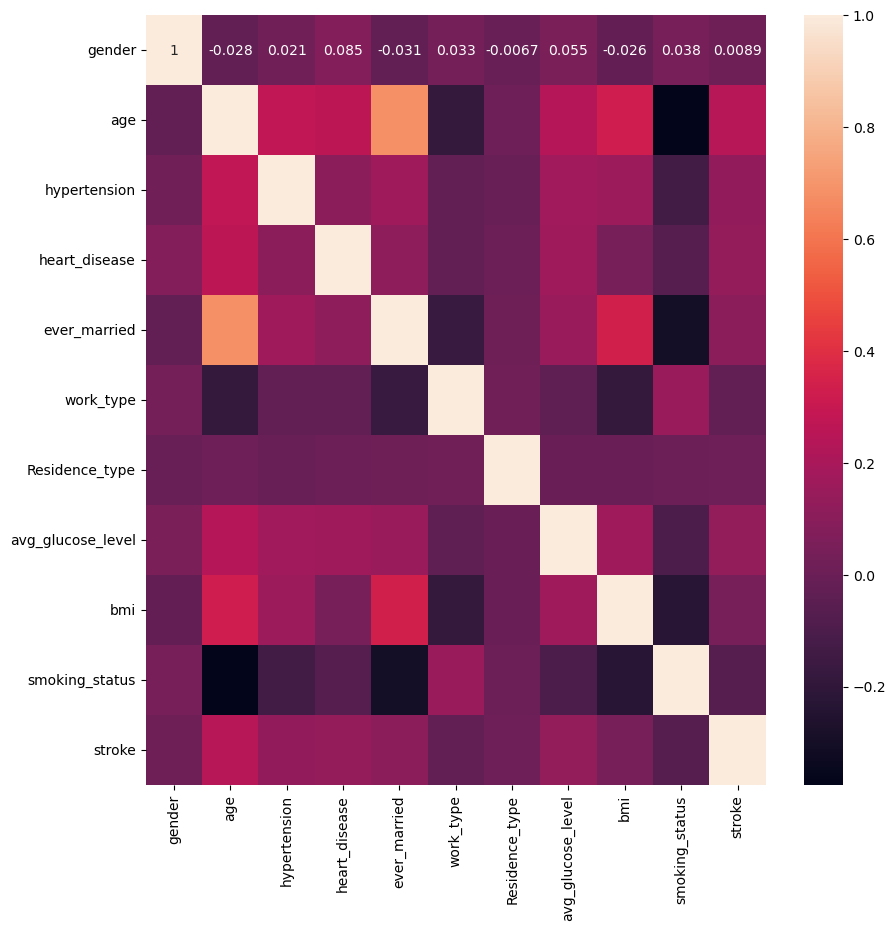

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [45]:
df['age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        0, 41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

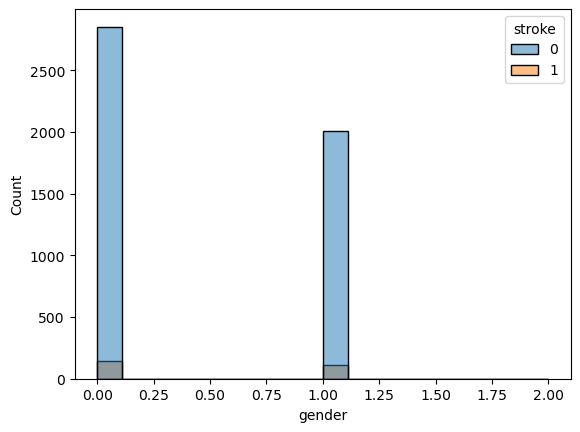

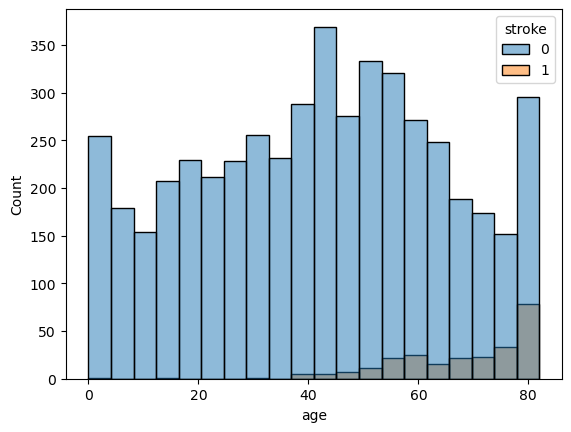

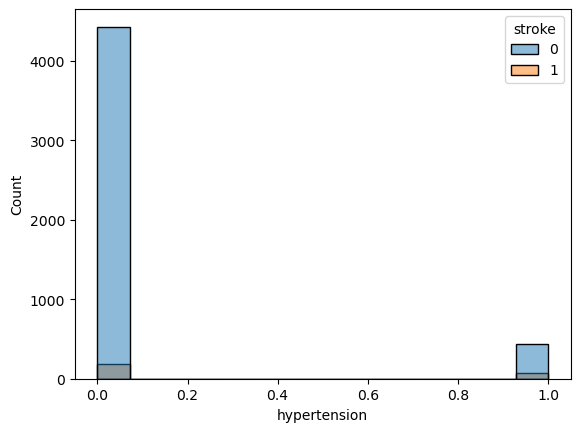

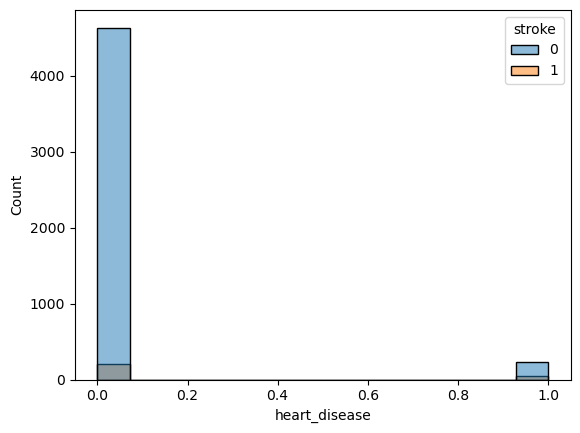

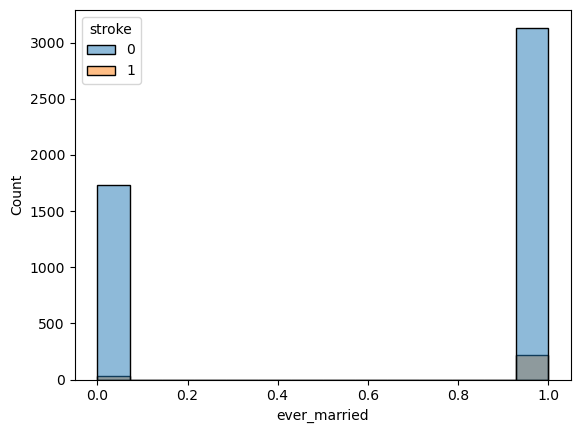

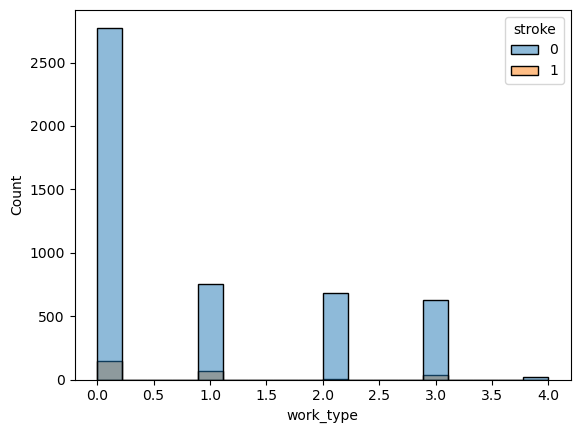

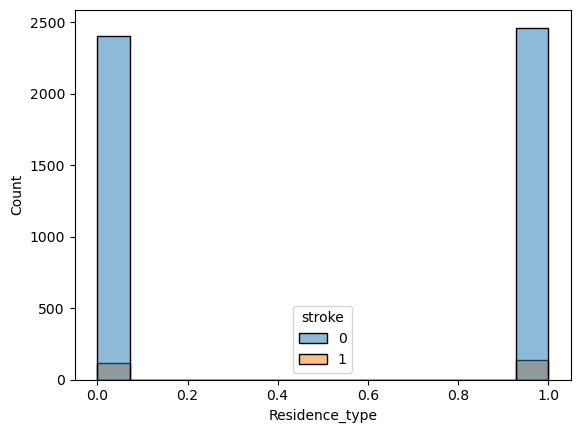

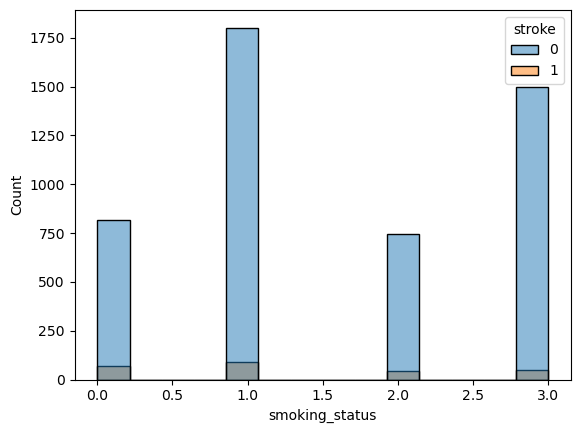

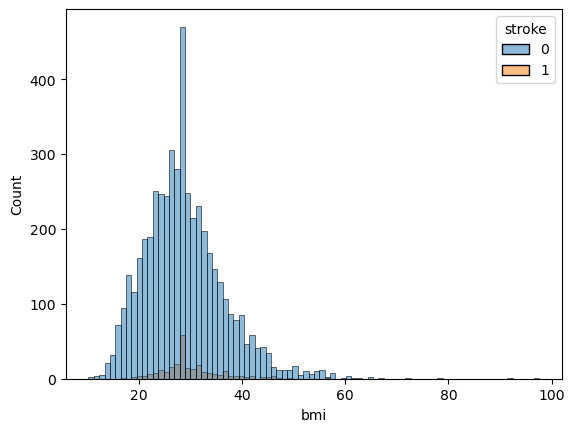

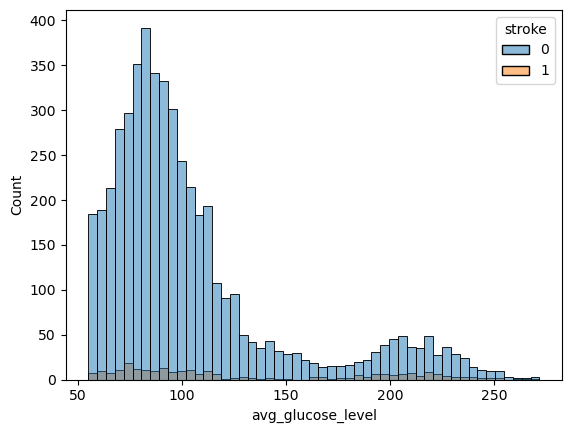

In [49]:
l = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
     'work_type', 'Residence_type', 'smoking_status', 'bmi', 'avg_glucose_level']
for i in l:
    sns.histplot(x=i,  hue='stroke',data=df)
    plt.show()

In [51]:
X=df.drop('stroke',axis=1)
y=df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [53]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
lr.score(X_test,y_test)

0.9393346379647749

In [57]:
lr_pred=lr.predict(X_test)
accuracy_score(y_test,lr_pred)

0.9393346379647749

In [59]:
confusion_matrix(y_test,lr_pred)

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [61]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.060665362035225046
Logistic Regression Model Mean Squared Error:  0.060665362035225046


In [63]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [65]:
svm.score(X_test,y_test)

0.9393346379647749

In [67]:
svm_pred=lr.predict(X_test)
accuracy_score(y_test,svm_pred)

0.9393346379647749

In [69]:
confusion_matrix(y_test,svm_pred)

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [71]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, svm_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, svm_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, svm_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, svm_pred))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.060665362035225046
SVM Model Mean Squared Error:  0.060665362035225046


In [73]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
dt.score(X_test, y_test)

0.9158512720156555

In [77]:
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9158512720156555

In [79]:
confusion_matrix(y_test,dt_pred)

array([[924,  36],
       [ 50,  12]], dtype=int64)

In [81]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.9158512720156555
Decision Tree Model F1 score:  0.21818181818181817
Decision Tree Model Mean Absolute Error:  0.08414872798434442
Decision Tree Model Mean Squared Error:  0.08414872798434442


In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9354207436399217

In [85]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9354207436399217

In [87]:
confusion_matrix(y_test,knn_pred)

array([[955,   5],
       [ 61,   1]], dtype=int64)

In [89]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Model F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))

KNN Model Accuracy Score: 0.9354207436399217
KNN Model F1 score:  0.02941176470588235
KNN Model Mean Absolute Error:  0.06457925636007827
KNN Model Mean Squared Error:  0.06457925636007827


## **Model Comparison**

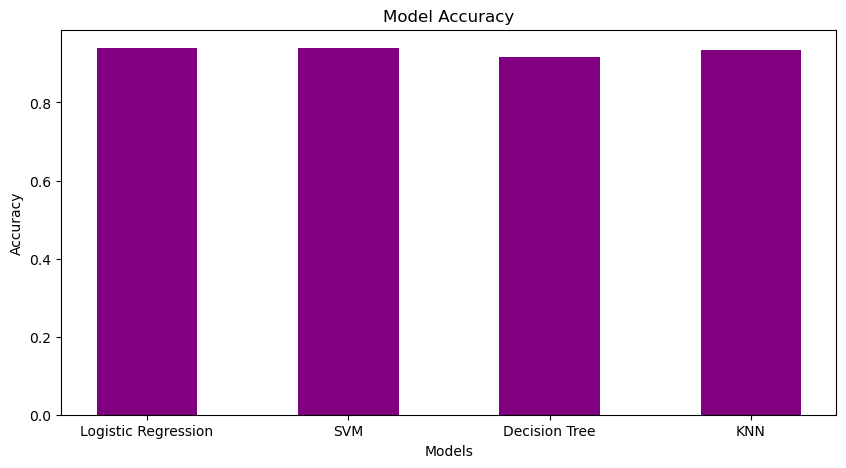

In [92]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color='purple',width = 0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()